[[3.91647936]
 [3.04009157]]


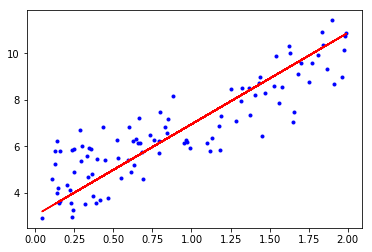

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Nomal Eqation Example

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

# theta = inv(Xt[dot]X)[dot]Xt[dot]y
X_b = np.c_[np.ones((100,1)), X]
theata_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
y_b = theata_best[0]*X+theata_best[1]

%matplotlib inline
plt.figure()
plt.plot(X,y,'b.')
plt.plot(X,y_b,'r-')
plt.show()

In [17]:
# Batch Gradiem Descent
eta = 0.01 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[3.91647936]
 [3.04009157]]


In [19]:
# Stochastic Gradient Descent
n_epochs = 100
t0, t1 = 5, 50 # learning scheduel hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
print('Stochastic gradient descent',theta)

Stochastic gradient descent [[3.90294364]
 [3.02996536]]


In [26]:
# Polynomial Regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
y_predict = lin_reg.tranform(X_poly)

plt.figure()
plt.plot(X,y,'b.')
plt.plot(X,y_predict)
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'tranform'